# Testing basic tree  algorithms in 2d 


Test of decision tree (DT) on a classification task with two variables, and a well defined separation line on the 2-d plane.   

### Performance verification :
    
* Look at evolution of loss as a function of the epoch for training and validation samples (only for LR)
* Plot distribution of output probability for signal and background
* Plot ROC
* For relevant variables compare distribution for events with probability<0.5 and events with probability<0.5
* Write out the optimised weights to nderstand the relative importance of variables (LR)
* Draw the final tree (DT)

In [5]:
import math # for mathematical functions such as square root
import numpy as np # for numerical calculations such as histogramming
import matplotlib.pyplot as plt
import pandas as pd

# Generate pattern in 2-d space

Divide a 2-d space in two regions based on a function of the two variables, 
and populate the two regions with randomly distributed points 

In [6]:
# define how many events you want
n=10000
# generate random inputs in [-0.5, 0.5]
X1 = np.random.random(n)-0.5
X2 = np.random.random(n)-0.5
# Define partition of space as a boolean function of the two variables
# Y = X1*0.2+X2*0.3<0
# Y=((X1<0) & (X2<0)) | ((X1>0.25) & (X2>0.25))
#Y=((X1<-0.33) & (X2<0)) | ((X1>0.28) & (X2>0.40))
#Y=X1*X1*0.3-X2*0.2>0
Y=X1*X1*0.3-X2*0.2>0
# stacking requires vectors to be defined as 2-d vector with
# second dimension=1
X1 = X1.reshape(n, 1)
X2 = X2.reshape(n, 1)
Y = Y.reshape(n, 1)
# print(X1)
# print(X2)
# print(Y)
data= np.hstack((X1, X2, Y))
# print(data)
df = pd.DataFrame(data,columns=['x1', 'x2','SIG'])

Visualise generated patterns in 2-d parameter space

In [7]:
def plot_scat(df, sel1, sel2, var1, var2, blx, bhx, bly, bhy):
  df_pass = df.query(sel1)
  df_nopass = df.query(sel2)
  fig= plt.figure(figsize=(14,5))
  plt.subplot(1, 2,1)
  plt.xlim([blx,bhx])
  plt.ylim([bly,bhy])
  plt.plot(np.asarray(df_nopass[var1]), np.asarray(df_nopass[var2]), 'bo', alpha=0.4, label=sel2)
  plt.legend(loc='best')
  plt.xlabel(var1)
  plt.ylabel(var2)
  plt.subplot(1, 2,2)
  plt.xlim([blx,bhx])
  plt.ylim([blx,bhx])
  plt.plot(np.asarray(df_pass[var1]), np.asarray(df_pass[var2]), 'ro', alpha=0.4, label=sel1)
  plt.legend(loc='best')
  plt.xlabel(var1)
  plt.ylabel(var2)
  plt.show()

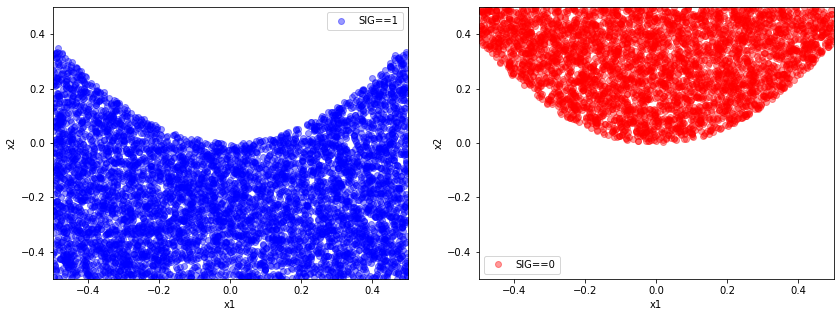

In [8]:
# now plot the covered area for the two 

sel1='SIG==0'
sel2='SIG==1'
plot_scat(df, sel1, sel2, 'x1', 'x2', -0.5, 0.5, -0.5, 0.5)

## Split train test and validation with sklearn

In [9]:
from sklearn.model_selection import train_test_split
#Define vectors for input to ML
# Use 'SIG' column as definition of target
y = df['SIG']
# define dataframe out of all columns except the "SIG" one
X = df[[col for col in df.columns if col!="SIG"]]
col_fin=X.columns
X_tv, X_test, y_tv, y_test = train_test_split(X, y,
                                   test_size=.25, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_tv, y_tv,
                                   test_size=.10, random_state=0)


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Decision tree classifier family

In [24]:
#  Set which one to run 
#  1: decision tree
#  2: random forest
#  3: adaboost 
#  4: gradient boost
#  5: XGB
runtree=2

In [25]:
test_tree = pd.DataFrame(X_test)
test_tree.columns=col_fin

## Simple decision tree

Documentation for the possible options is in <br />

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
    

In [26]:
if runtree==1:
  from sklearn.tree import DecisionTreeClassifier
  from sklearn import tree

  clf = DecisionTreeClassifier(max_leaf_nodes=6, criterion='gini', splitter='best', random_state=0)
  clf.fit(X_train, y_train)

  Ypredt=clf.predict_proba(test_tree)

  print('Training finished')

## Random forest classifier

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [27]:
if runtree==2:
  from sklearn.ensemble import RandomForestClassifier

  clf = RandomForestClassifier(max_depth=5, max_features="sqrt", max_leaf_nodes=6, n_estimators=100, random_state=0)
  clf.fit(X_train, y_train)

  Ypredt=clf.predict_proba(test_tree)
 
  print('Training finished')

Training finished


## Adaboost classifier

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

In [28]:
if runtree==3:
  from sklearn.ensemble import AdaBoostClassifier

  clf = AdaBoostClassifier(n_estimators=100, learning_rate=1, random_state=0)
  clf.fit(X_train, y_train)

  Ypredt=clf.predict_proba(test_tree)
 
  print('Training finished')

## Gradient boost classifier

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html


In [29]:
if runtree==4:
  from sklearn.ensemble import GradientBoostingClassifier

  clf = GradientBoostingClassifier(max_depth=3, n_estimators=100, random_state=0)
  clf.fit(X_train, y_train)

  Ypredt=clf.predict_proba(test_tree)
 
  print('Training finished')

## XGB

https://xgboost.readthedocs.io/en/stable/python/



In [30]:
if runtree==5:
  import xgboost as xgb  
  import time
  print(xgb.__version__)

#Use default parameters and train on full dataset
  XGBclassifier = xgb.sklearn.XGBClassifier(nthread=7, seed=1, objective='binary:logistic', use_label_encoder=False,
                                          eta=0.05, max_depth=3, n_estimators=100)
#Train and time classifier
  start_time = time.time()
  eval_set = [(X_train, y_train), (X_test, y_test)]
  XGBclassifier.fit(X_train, y_train, eval_metric=["logloss"], eval_set=eval_set,verbose=True  )
  run_time = time.time() - start_time

#XGBclassifier.save_model('xgb_test')
  Ypredt= XGBclassifier.predict_proba(X_test)[:,1]



In [31]:
if runtree==5:
  results = XGBclassifier.evals_result()
  epochs = len(results['validation_0']['logloss'])
  x_axis = range(0, epochs)
    
# plot log loss
  fig, ax = plt.subplots(figsize=(10,10))
  ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
  ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
  ax.legend()
    
  plt.ylabel('Log Loss')
  plt.title('XGBoost Log Loss')
  plt.show()

In [32]:
print(Ypredt.shape)
df_test_acc_t=X_test.copy()
df_test_acc_t['SIG']=y_test
if runtree<5:
  df_test_acc_t['PROB']=Ypredt[:,1]
if runtree==5:
  df_test_acc_t['PROB']=Ypredt


(2500, 2)


## Plot distribution of output probabilities  for signal and backround

nsig  1545
nbkg  955


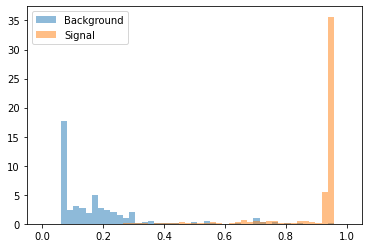

In [33]:
# split according to the label
df_test_acc_t_bkg = df_test_acc_t.query('SIG==0')
df_test_acc_t_sig = df_test_acc_t.query('SIG==1')
print('nsig ',df_test_acc_t_sig.shape[0])
print('nbkg ',df_test_acc_t_bkg.shape[0])
bins = np.linspace(0, 1,50)
plt.hist(df_test_acc_t_bkg.PROB, bins, alpha=0.5, density=True, label='Background')
plt.hist(df_test_acc_t_sig.PROB, bins, alpha=0.5, density=True, label='Signal')
plt.legend(loc='best')
plt.show()

## Plot ROC curve and calculate AUC

Regression auc  0.9929449838187703


<function matplotlib.pyplot.show(close=None, block=None)>

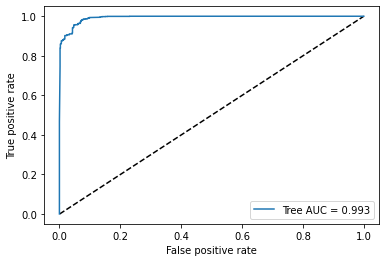

In [34]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

plt.plot([0.001, 1], [0, 1], 'k--')
if runtree<5:
  fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, Ypredt[:,1])
if runtree==5:
  fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, Ypredt)

auc_keras = auc(fpr_keras, tpr_keras)
print("Regression auc ",auc_keras)
plt.plot(fpr_keras, tpr_keras, label='Tree AUC = {:.3f}'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')
plt.show    


## Visualise patterns in 2-d space

SIG==0 SIG==1


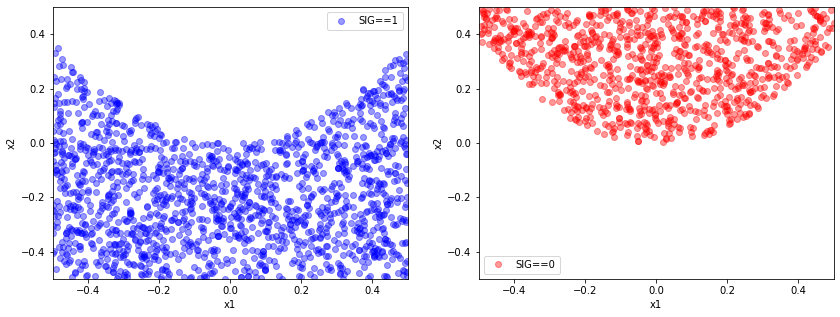

PROB<0.5 PROB>0.5


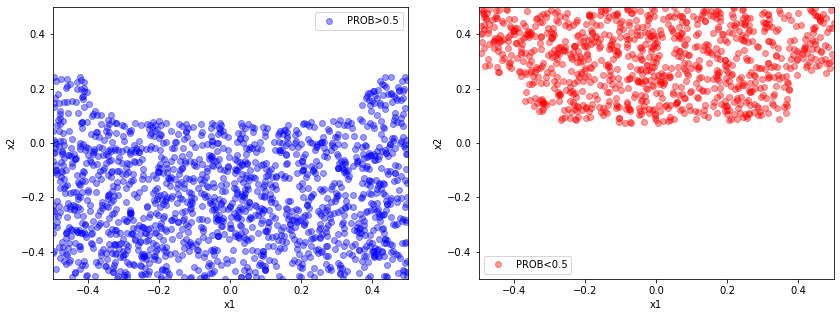

In [35]:
sel1='SIG==0'
sel2='SIG==1'
print(sel1,sel2)
plot_scat(df_test_acc_t, sel1, sel2, 'x1', 'x2', -0.5, 0.5, -0.5, 0.5)
thrmax=0.5
sel1='PROB<'+str(thrmax)
sel2='PROB>'+str(thrmax)
print(sel1,sel2)
plot_scat(df_test_acc_t, sel1, sel2, 'x1', 'x2', -0.5, 0.5, -0.5, 0.5)

## Compare label and prediction in 1-d projections

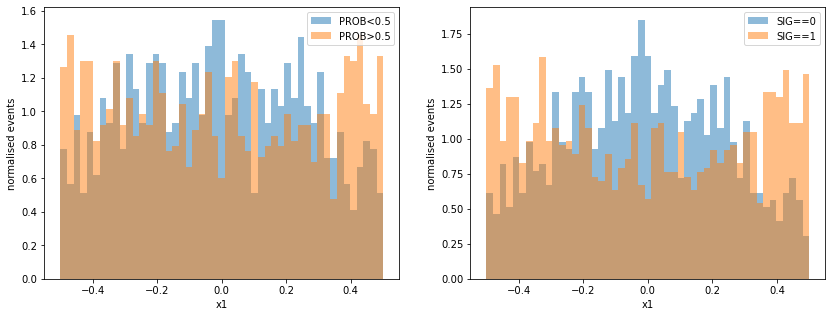

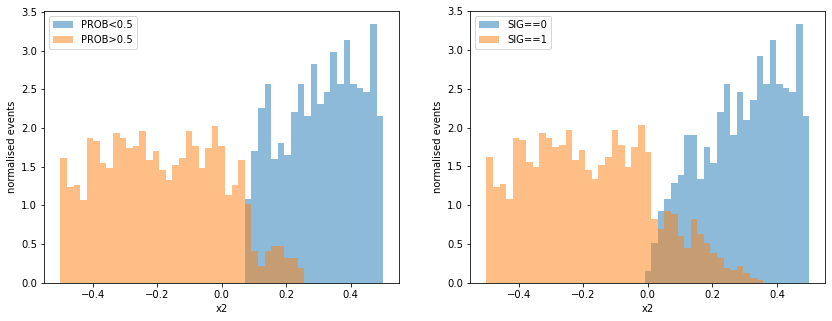

In [36]:
pred_false='PROB<0.5'
pred_true='PROB>0.5'
lab_false='SIG==0'
lab_true='SIG==1'
nbin=50
blow=-0.5
bhigh=0.5
bins = np.linspace(blow, bhigh, nbin)
fig1= plt.figure(figsize=(14,5))
plt.subplot(1, 2,1)
var="x1"
plt.hist(df_test_acc_t.query(pred_false)[var], bins, alpha=0.5, density=True, label=pred_false)
plt.hist(df_test_acc_t.query(pred_true)[var], bins, alpha=0.5, density=True, label=pred_true)
plt.legend(loc='best')
plt.xlabel(var)
plt.ylabel('normalised events')
plt.subplot(1, 2,2)
plt.hist(df_test_acc_t.query(lab_false)[var], bins, alpha=0.5, density=True, label=lab_false)
plt.hist(df_test_acc_t.query(lab_true)[var], bins, alpha=0.5, density=True, label=lab_true)
plt.legend(loc='best')
plt.xlabel(var)
plt.ylabel('normalised events')
plt.show()
fig2= plt.figure(figsize=(14,5))
plt.subplot(1, 2,1)
var="x2"
plt.hist(df_test_acc_t.query(pred_false)[var], bins, alpha=0.5, density=True, label=pred_false)
plt.hist(df_test_acc_t.query(pred_true)[var], bins, alpha=0.5, density=True, label=pred_true)
plt.legend(loc='best')
plt.xlabel(var)
plt.ylabel('normalised events')
plt.subplot(1, 2,2)
plt.hist(df_test_acc_t.query(lab_false)[var], bins, alpha=0.5, density=True, label=lab_false)
plt.hist(df_test_acc_t.query(lab_true)[var], bins, alpha=0.5, density=True, label=lab_true)
plt.legend(loc='best')
plt.xlabel(var)
plt.ylabel('normalised events')
plt.show()

## Visualize tree (only for simpe tree)

In [37]:
if runtree==1:
  import graphviz
  dot_data = tree.export_graphviz(clf, out_file=None)
  dot_data = tree.export_graphviz(clf, out_file=None,
                     class_names=["bad","good"],
                     filled=True, rounded=True,
                     special_characters=True)
  graph = graphviz.Source(dot_data)
  graph

# Exercises

* Uncomment and try different patterns in generation and look how the algorithms performs in different cases
* Study dependence of performance from number of events
* Study dependence of performance of regression from choice of optimizer number of epoch, size of batches
* Study dependence of performance of decision tree from number of leaves, depth of tree
* For ensemble methods study performance as a function of number of estimators
* Extend generation to three variables, and test the algorithms